# **Import Dataset**

In [39]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

df = pd.read_csv("quikr_car.csv")
df.rename(columns={"Name of car": "CarName",
                   "Company name": "Company",
                   "Kms driven": "Kms",
                   "Fuel_type": "Fuel"}, inplace=True)
df

,CarName,Company,Year,Price,Kms,Fuel
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [40]:
df.dtypes

CarName    object
Company    object
Year       object
Price      object
Kms        object
Fuel       object
dtype: object

In [41]:
df.isnull().sum()

CarName     0
Company     0
Year        0
Price       0
Kms        52
Fuel       55
dtype: int64

# Data Preprocessing

In [42]:
df['Year'] = pd.to_numeric(df['Year'],errors='coerce')

df.isnull().sum()

CarName     0
Company     0
Year       50
Price       0
Kms        52
Fuel       55
dtype: int64

In [43]:
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')
df.isnull().sum()

CarName     0
Company     0
Year       50
Price      35
Kms        52
Fuel       55
dtype: int64

In [44]:
df['Kms'] = df['Kms'].str.replace(',','')
df['Kms'] = df['Kms'].str.replace(' kms','')
df['Kms'] = pd.to_numeric(df['Kms'],errors='coerce')
df.isnull().sum()

CarName     0
Company     0
Year       50
Price      35
Kms        54
Fuel       55
dtype: int64

In [45]:
df

,CarName,Company,Year,Price,Kms,Fuel
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007.0,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006.0,425000.0,40.0,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018.0,NaN,22000.0,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014.0,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014.0,575000.0,36000.0,Diesel
...,...,...,...,...,...,...
887,Ta,Tara,NaN,310000.0,NaN,NaN
888,Tata Zest XM Diesel,Tata,2018.0,260000.0,27000.0,Diesel
889,Mahindra Quanto C8,Mahindra,2013.0,390000.0,40000.0,Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014.0,180000.0,NaN,NaN


In [46]:
df.dropna(subset=['CarName','Company','Fuel'],inplace=True)
df

,CarName,Company,Year,Price,Kms,Fuel
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007.0,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006.0,425000.0,40.0,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018.0,NaN,22000.0,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014.0,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014.0,575000.0,36000.0,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011.0,270000.0,50000.0,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009.0,110000.0,30000.0,Diesel
886,Toyota Corolla Altis,Toyota,2009.0,300000.0,132000.0,Petrol
888,Tata Zest XM Diesel,Tata,2018.0,260000.0,27000.0,Diesel


In [47]:
df['Year'] = df['Year'].astype(int)

In [48]:
df.dtypes

CarName     object
Company     object
Year         int64
Price      float64
Kms        float64
Fuel        object
dtype: object

In [49]:
meanPrice = df['Price'].mean()
df['Price'] = df['Price'].replace(np.nan, meanPrice)
df

,CarName,Company,Year,Price,Kms,Fuel
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.000000,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.000000,40.0,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,411717.615196,22000.0,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.000000,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.000000,36000.0,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000.000000,50000.0,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000.000000,30000.0,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000.000000,132000.0,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000.000000,27000.0,Diesel


In [50]:
df.isnull().sum()

CarName    0
Company    0
Year       0
Price      0
Kms        0
Fuel       0
dtype: int64

# **Descriptive Statistics**

In [51]:
df.shape

(837, 6)

In [52]:
df.columns

Index(['CarName', 'Company', 'Year', 'Price', 'Kms', 'Fuel'], dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 889
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CarName  837 non-null    object 
 1   Company  837 non-null    object 
 2   Year     837 non-null    int64  
 3   Price    837 non-null    float64
 4   Kms      837 non-null    float64
 5   Fuel     837 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 45.8+ KB


In [54]:
df.describe()

,Year,Price,Kms
count,837.000000,8.370000e+02,837.000000
mean,2012.513740,4.117176e+05,46034.457587
std,4.028174,4.691782e+05,34483.283332
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.780000e+05,25000.000000
50%,2013.000000,3.100000e+05,41000.000000
75%,2015.000000,4.899990e+05,56450.000000
max,2019.000000,8.500003e+06,400000.000000


In [55]:
len(df['CarName'].unique())

473

In [56]:
len(df['Company'].unique())

25

In [57]:
df['Company'].value_counts()

Maruti        229
Hyundai       143
Mahindra       99
Tata           67
Honda          60
Toyota         38
Chevrolet      34
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Datsun          8
Mini            8
BMW             8
Mitsubishi      6
Nissan          6
Mercedes        6
Fiat            4
Force           4
Hindustan       3
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: Company, dtype: int64

In [58]:
df['Year'].value_counts()

2015    117
2013     94
2014     92
2016     76
2012     75
2011     60
2009     55
2017     54
2010     44
2018     34
2006     22
2019     22
2007     19
2008     16
2005     13
2003     13
2004     12
2000      7
2002      5
2001      5
1995      2
Name: Year, dtype: int64

<Axes: >

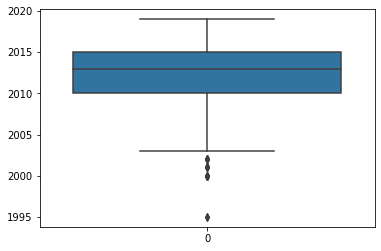

In [59]:
sns.boxplot(df['Year'])

In [60]:
marutiData = df[df['Company']=='Maruti']
marutiData

,CarName,Company,Year,Price,Kms,Fuel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,411717.615196,22000.0,Petrol
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,250000.000000,60000.0,Petrol
11,Maruti Suzuki Stingray VXi,Maruti,2015,315000.000000,30000.0,Petrol
19,Maruti Suzuki Alto 800,Maruti,2014,160000.000000,35550.0,Petrol
22,Maruti Suzuki Alto 800 Vxi,Maruti,2015,75000.000000,39000.0,Petrol
...,...,...,...,...,...,...
876,Maruti Suzuki Dzire,Maruti,2016,450000.000000,2500.0,Diesel
879,Maruti Suzuki Alto LXi BS III,Maruti,2005,95000.000000,65000.0,Petrol
880,Maruti Suzuki Swift Dzire Tour VDi,Maruti,2009,250000.000000,51000.0,Diesel
882,Maruti Suzuki Alto 800 Select Variant,Maruti,2015,411717.615196,70000.0,Petrol


In [61]:
import plotly.express as px

In [62]:
fig = px.box(marutiData, y='Price')
fig.show()

In [63]:
scatterfig = px.scatter(marutiData, x='Year', y='Price')
scatterfig.show()

In [64]:
scatterfig2 = px.scatter(marutiData, x='Kms', y='Price')
scatterfig2.show()

Summary of Observations (Maruti Cars only)
- Year and Price have a positive correlation
- Kms and Price have a negative correlation

In [65]:
gdf = df.groupby(['Year','Company'])['Price']
gdf.first()

#for name, group in gdf:
#    print(name)
#    print(group)
#    print('\n')

#df[df['Year']==2019]['Company'].unique()

Year  Company   
1995  Hindustan     7.500000e+05
      Maruti        3.000000e+04
2000  Hindustan     7.000000e+04
      Honda         6.500000e+04
      Hyundai       5.900000e+04
                        ...     
2019  Nissan        1.200000e+06
      Renault       3.700000e+05
      Tata          6.500000e+05
      Toyota        4.117176e+05
      Volkswagen    1.200000e+06
Name: Price, Length: 179, dtype: float64

In [66]:
gdf2 = df.groupby(['Fuel','Company'])
gdf2.first()

CarName  Year  \
Fuel   Company                                                               
Diesel Audi                                                  Audi Q7  2014   
       BMW                                   BMW 5 Series 520d Sedan  2011   
       Chevrolet                            Chevrolet Beat LT Diesel  2012   
       Fiat                                   Fiat Punto Emotion 1.2  2012   
       Force                     Force Motors Force One LX ABS 7 STR  2015   
       Ford                         Ford EcoSport Titanium 1.5L TDCi  2014   
       Hindustan                         Hindustan Motors Ambassador  2000   
       Honda                                             Honda Amaze  2013   
       Hyundai                             Hyundai Verna Fluidic New  2015   
       Jaguar                            Jaguar XF 2.2 Diesel Luxury  2013   
       Jeep                       Jeep Wrangler Unlimited 4x4 Diesel  2015   
       Land                               Land Rover Freelander 2 SE  2015   
       Mahindra                              Mahindra Jeep CL550 MDI  2006   
       Maruti                        Maruti Suzuki Vitara Brezza ZDi  2016   
       Mercedes                Mercedes Benz GLA Class 200 CDI Sport  2015   
       Mitsubishi            Mitsubishi Pajero Sport Limited Edition  2015   
       Nissan                               Nissan Terrano XL D Plus  2015   
       Renault                               Renault Lodgy 85 PS RXL  2018   
       Skoda                      Skoda Yeti Ambition 2.0 TDI CR 4x2  2012   
       Tata                             Tata Indigo eCS LS CR4 BS IV  2017   
       Toyota                        Toyota Innova 2.0 G 8 STR BS IV  2012   
       Volkswagen       Volkswagen Vento Highline Plus 1.5 Diesel AT  2019   
       Volvo                                     Volvo S80 Summum D4  2015   
LPG    Maruti                               Maruti Suzuki Eeco 7 STR  2013   
Petrol Audi                                                  Audi A8  2017   
       BMW                                         BMW 3 Series 320i  2011   
       Chevrolet                              Chevrolet Spark LS 1.0  2010   
       Datsun                                       Datsun Redi GO S  2017   
       Fiat                                    Fiat Petra ELX 1.2 PS  2008   
       Ford                                            Ford EcoSport  2017   
       Hindustan   Hindustan Motors Ambassador Classic Mark 4 – Befo  1995   
       Honda                                     Honda City 1.5 S MT  2011   
       Hyundai                  Hyundai Santro Xing XO eRLX Euro III  2007   
       Jaguar                                 Jaguar XE XE Portfolio  2016   
       Mahindra                        Mahindra Logan Diesel 1.5 DLS  2009   
       Maruti                             Maruti Suzuki Alto 800 Vxi  2018   
       Mercedes                    Mercedes Benz B Class B180 Sports  2014   
       Mini                                        Mini Cooper S 1.6  2013   
       Mitsubishi            Mitsubishi Pajero Sport Limited Edition  2015   
       Nissan                                        Nissan Micra XV  2011   
       Renault                                          Renault Kwid  2016   
       Skoda                             Skoda Fabia Classic 1.2 MPI  2010   
       Tata                                       Tata Indica V2 eLS  2006   
       Toyota                        Toyota Corolla Altis Petrol Ltd  2009   
       Volkswagen               Volkswagen Polo Highline Exquisite P  2014   

                          Price       Kms  
Fuel   Company                             
Diesel Audi        5.000000e+05   16934.0  
       BMW         1.299000e+06   49000.0  
       Chevrolet   1.350000e+05   45000.0  
       Fiat        1.695000e+05   37200.0  
       Force       5.800000e+05    3200.0  
       Ford        5.750000e+05   36000.0  
       Hindustan   7.000000e+04  200000.0 

## TEST GROUPBY

In [67]:
# import the pandas library
import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df2 = pd.DataFrame(ipl_data)
df2


,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [68]:
grouped = df2.groupby('Team')
grouped.first()

,Rank,Year,Points
Team,,,
Devils,2,2014,863
Kings,3,2014,741
Riders,1,2014,876
Royals,4,2014,701
kings,4,2015,812


In [69]:
grouped2 = df2.groupby('Team').mean()
grouped2

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.500000,768.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.250000
Royals,2.500000,2014.500000,752.500000
kings,4.000000,2015.000000,812.000000


In [70]:
grouped3 = df2.groupby('Team').count()
grouped3

,Rank,Year,Points
Team,,,
Devils,2,2,2
Kings,3,3,3
Riders,4,4,4
Royals,2,2,2
kings,1,1,1


# **Create Model**

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [129]:
x = df[["Kms"]] #independent
y = df[["Price"]]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [130]:
lr = LinearRegression().fit(x_train,y_train)

In [131]:
y_pred = lr.predict(x_test)

In [132]:
b = lr.intercept_
b

array([479818.20851903])

In [133]:
m = lr.coef_[0]
m

array([-1.45296029])

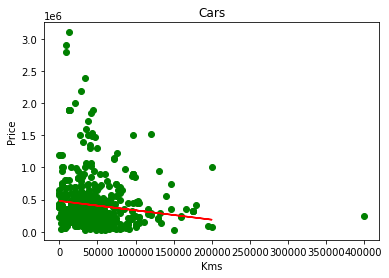

In [134]:
plt.scatter(x_train,y_train,color='g')
plt.plot(x_test,y_pred,color='r')

plt.title('Cars')
plt.xlabel('Kms')
plt.ylabel('Price')

plt.show()

In [122]:
print('R2:  ',r2_score(y_test, y_pred))
print('MSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2:   0.011000307307921897
MSE:  687248.1479803213


In [127]:
df.shape

(837, 6)

## **TRY WITH ANOTHER X VALUE**

In [135]:
x = df[["Year"]] #independent
y = df[["Price"]]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
lr = LinearRegression().fit(x_train,y_train)
y_pred = lr.predict(x_test)
print('R2:  ',r2_score(y_test, y_pred))
print('MSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2:   0.07598422454048936
MSE:  328680.4791257526


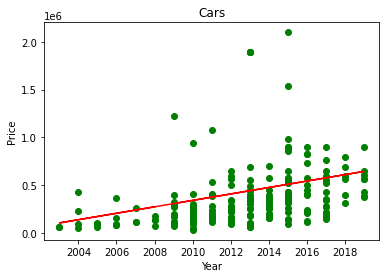

In [136]:
plt.scatter(x_test,y_test,color='g')
plt.plot(x_test,y_pred,color='r')

plt.title('Cars')
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()